In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import enum
from Py.BS import TypeOptionVanilla
import pandas as pd
from Py.Market import *
from Py.ResultSimulation import *
from Py.BlackScholes import *
from Py.Heston import *
from Py.CalibrationProduct import *
from Py.AutocallProduct import *

from Py.AutocallPricer import *
from Py.MCSensi import *

### Create Market

In [3]:
spot = 100
marketObj = Market(spot)
marketObj.initBlack(r= 0.00,repo = 0.000,vol = 0.2)

### Create Model for Pricing

In [4]:
hestonObj = Heston(marketObj,rho = -0.7,Vo = 0.2,nu=0.7)
bsModel = BlackScholesModel(marketObj,sigma= 0.2)

##### Set For calibration

In [7]:
listK = [90,100,110,120]
listT = [5]
So = 100
listCalibrationProducts = []

for K in listK:
    
    sens = 1 if K <=So else -1
    for T in listT:        
        listCalibrationProducts.append(VanillaProduct(K,T,marketObj,sens))

In [15]:
hestonObj.calibrate(listCalibrationProducts,verbose=1)

The maximum number of function evaluations is exceeded.
Number of iterations: 1000, function evaluations: 6816, CG iterations: 1901, optimality: 3.69e-06, constraint violation: 0.00e+00, execution time: 1.1e+02 s.


In [17]:
hestonObj.printParams()

{'kappa': 3.9731322078758473,
 'theta': 0.025273510894741953,
 'Vo': 0.31893296155831685,
 'nu': 0.13340523614775804,
 'rho': -0.003288653021645551}

##### Check Calibration

In [18]:
model = hestonObj

In [19]:
[((model.modelPrice(u)-u.value)/u.value)*10000 for u in listCalibrationProducts]

[0.2410414426340739,
 -0.31235333665801357,
 -0.1992634673765191,
 0.17388210966381523]

### Create Autocall product and Price

##### Case Product degenerates to DIP without AC

In [5]:
spotRef=100
maturity=2
acBarrierLevel=9999
coupon=0
cpnBarrier=1.10
dipStrike=1
dipBarrier=0.8
isDipAmerican=True
cpnFrequency=Frequency.Annualy
isIncrementalFeature = False
isPhoenixMemory = False
nominal = 100
hasRedemption = False

In [6]:
autocallProduct = AutocallProduct(spotRef=spotRef,maturity=maturity,acBarrierLevel=acBarrierLevel,coupon=coupon,cpnBarrier=cpnBarrier,
                                  dipStrike=dipStrike,dipBarrier=dipBarrier,isDipAmerican=isDipAmerican,cpnFrequency=cpnFrequency,isIncrementalFeature = isIncrementalFeature,
                                isPhoenixMemory = isPhoenixMemory,Nominal=nominal,hasRedemption = hasRedemption )

In [7]:
Npaths = 50000
modelPaths = bsModel.generate_paths(maturity,Npaths=Npaths,listT=autocallProduct.counponsSimulDates(), isAntithetic=False,discretStep=Frequency.Monthly)

In [8]:
autocallPricer = AutocallPricer(autocallProduct,modelPaths,marketObj.discount)

In [9]:
priceDipWithoutAC = (1-(autocallPricer.price/nominal))*nominal

In [10]:
priceDipWithoutAC

9.696696837840602

In [11]:
sensiEngine = GenerateMCSensi(autocallProduct,AutocallPricer,bsModel,nbSim = 5000)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.05,0.1,0.3,0.5, 0.7, 1.0,1.2,1.4,1.7,2.0,2.5,3.0])

0.05 is being treated
0.1 is being treated
0.3 is being treated
0.5 is being treated
0.7 is being treated
1.0 is being treated
1.2 is being treated
1.4 is being treated
1.7 is being treated
2 is being treated
2.5 is being treated
3 is being treated
95.60090565681458


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


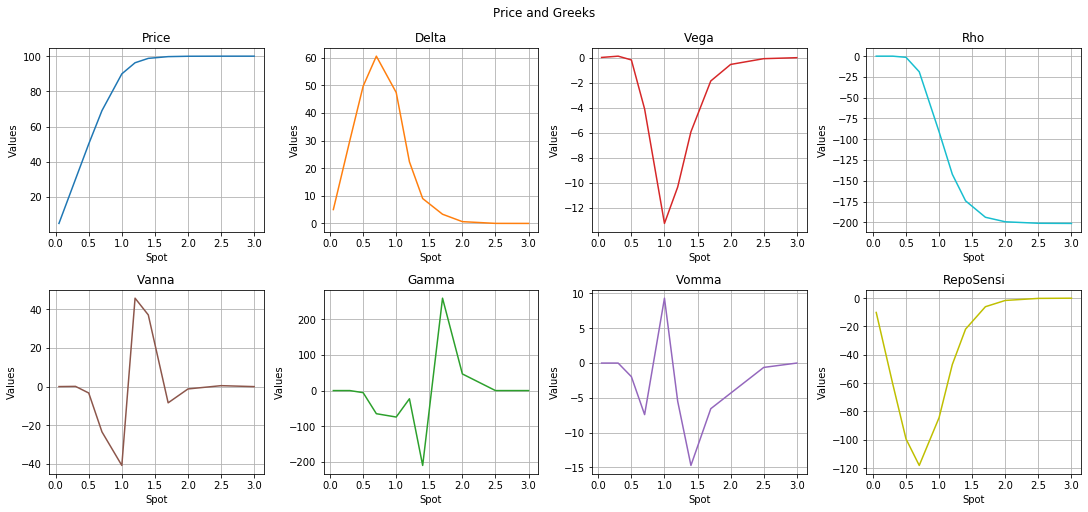

In [12]:
mcSensiPlot(resSensi)

##### Case Product full AC with AC barrier not so far from spot

0.05 is being treated
0.1 is being treated
0.3 is being treated
0.5 is being treated
0.7 is being treated
0.8 is being treated
0.9 is being treated
1.0 is being treated
1.2 is being treated
1.4 is being treated
1.5 is being treated
1.7 is being treated
2 is being treated
2.5 is being treated
3 is being treated
335.1871645450592


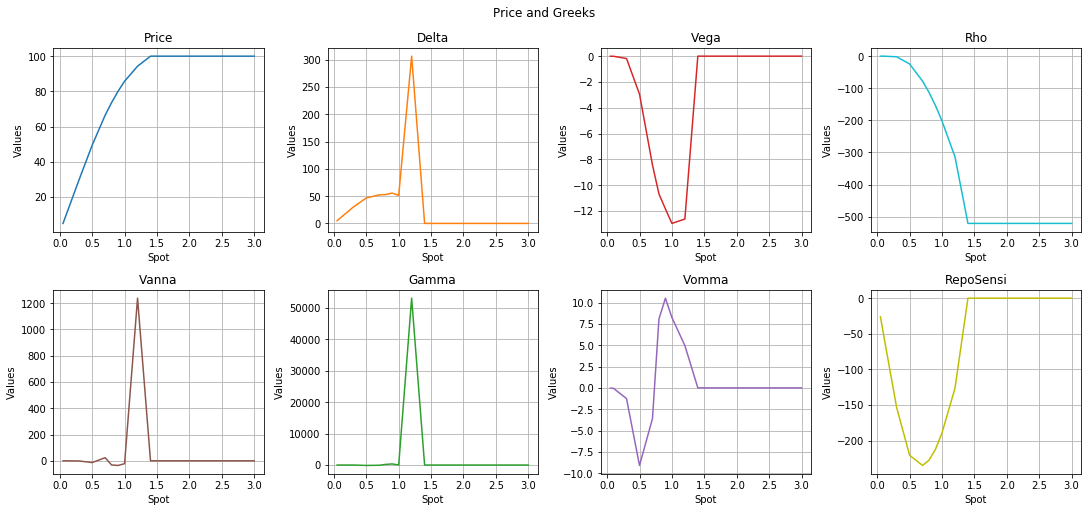

In [21]:
spotRef=100
maturity=5
acBarrierLevel=1.2
coupon=0.02
cpnBarrier=1.10
dipStrike=1
dipBarrier=0.9
isDipAmerican=True
cpnFrequency=Frequency.Annualy
isIncrementalFeature = False
isPhoenixMemory = False
nominal = 100
hasRedemption = False

autocallProduct = AutocallProduct(spotRef=spotRef,maturity=maturity,acBarrierLevel=acBarrierLevel,coupon=coupon,cpnBarrier=cpnBarrier,
                                  dipStrike=dipStrike,dipBarrier=dipBarrier,isDipAmerican=isDipAmerican,cpnFrequency=cpnFrequency,isIncrementalFeature = isIncrementalFeature,
                                isPhoenixMemory = isPhoenixMemory,Nominal=nominal,hasRedemption = hasRedemption )

sensiEngine = GenerateMCSensi(autocallProduct,AutocallPricer,bsModel,nbSim = 5000,discretStep = Frequency.TriDaily)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.05,0.1,0.3,0.5, 0.7,0.8,0.9, 1.0,1.2,1.4,1.5,1.7,2,2.5,3])
mcSensiPlot(resSensi)

##### Case Product full AC with AC barrier not so far from spot but no PDI

0.05 is being treated
0.1 is being treated
0.3 is being treated
0.5 is being treated
0.7 is being treated
0.8 is being treated
0.9 is being treated
1.0 is being treated
1.2 is being treated
1.4 is being treated
1.5 is being treated
1.7 is being treated
2 is being treated
2.5 is being treated
3 is being treated
284.0174415111542


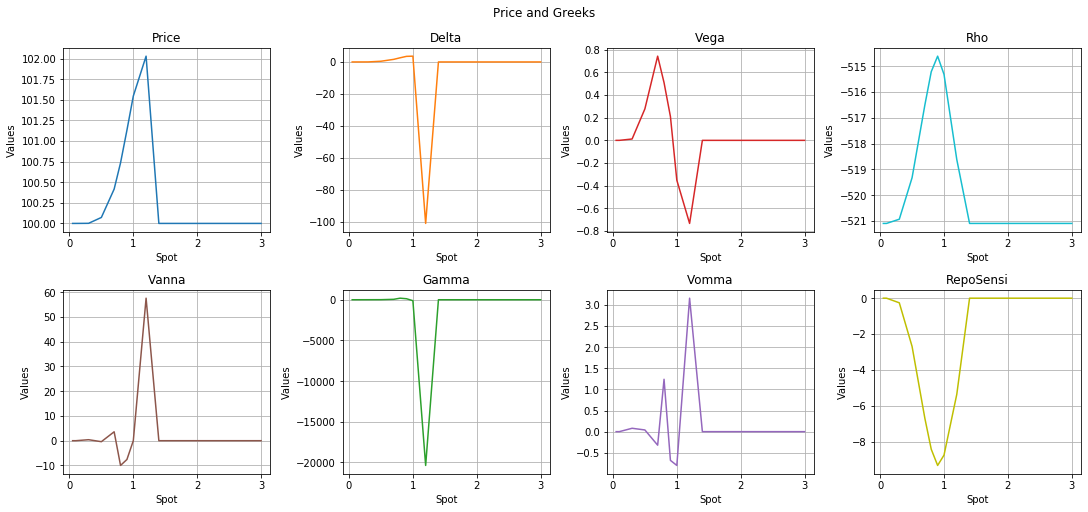

In [22]:
spotRef=100
maturity=5
acBarrierLevel=1.2
coupon=0.02
cpnBarrier=1.10
dipStrike=1
dipBarrier=0
isDipAmerican=False
cpnFrequency=Frequency.Annualy
isIncrementalFeature = False
isPhoenixMemory = False
nominal = 100
hasRedemption = False

autocallProduct = AutocallProduct(spotRef=spotRef,maturity=maturity,acBarrierLevel=acBarrierLevel,coupon=coupon,cpnBarrier=cpnBarrier,
                                  dipStrike=dipStrike,dipBarrier=dipBarrier,isDipAmerican=isDipAmerican,cpnFrequency=cpnFrequency,isIncrementalFeature = isIncrementalFeature,
                                isPhoenixMemory = isPhoenixMemory,Nominal=nominal,hasRedemption = hasRedemption )

sensiEngine = GenerateMCSensi(autocallProduct,AutocallPricer,bsModel,nbSim = 5000,discretStep = Frequency.TriDaily)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.05,0.1,0.3,0.5, 0.7,0.8,0.9, 1.0,1.2,1.4,1.5,1.7,2,2.5,3])
mcSensiPlot(resSensi)

##### Case Product full AC with AC barrier far from spot

0.05 is being treated
0.1 is being treated
0.3 is being treated
0.5 is being treated
0.7 is being treated
0.8 is being treated
0.9 is being treated
1.0 is being treated
1.2 is being treated
1.4 is being treated
1.5 is being treated
1.7 is being treated
2 is being treated
2.5 is being treated
3 is being treated
334.76191663742065


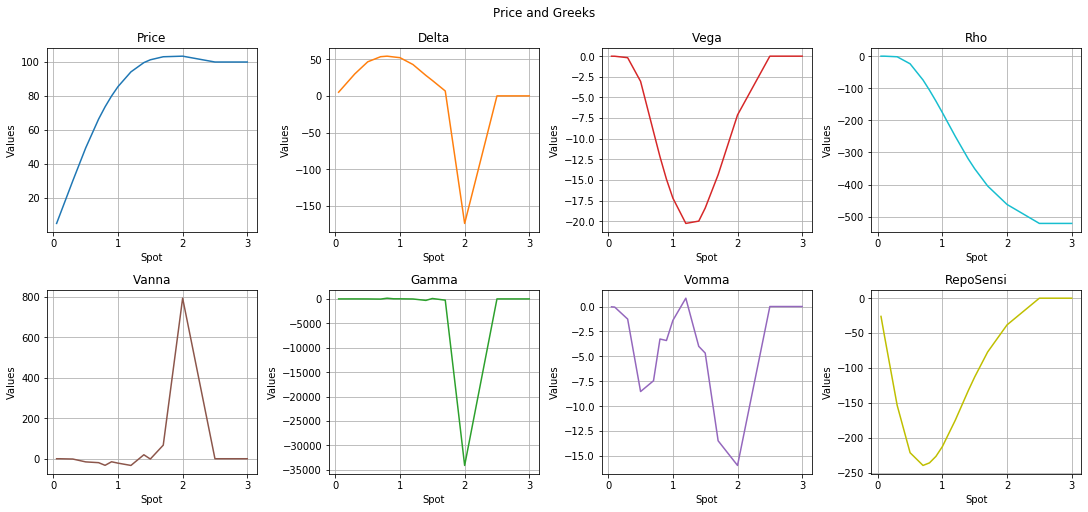

In [23]:
spotRef=100
maturity=5
acBarrierLevel=2
coupon=0.02
cpnBarrier=1.10
dipStrike=1
dipBarrier=0.9
isDipAmerican=True
cpnFrequency=Frequency.Annualy
isIncrementalFeature = False
isPhoenixMemory = False
nominal = 100
hasRedemption = False

autocallProduct = AutocallProduct(spotRef=spotRef,maturity=maturity,acBarrierLevel=acBarrierLevel,coupon=coupon,cpnBarrier=cpnBarrier,
                                  dipStrike=dipStrike,dipBarrier=dipBarrier,isDipAmerican=isDipAmerican,cpnFrequency=cpnFrequency,isIncrementalFeature = isIncrementalFeature,
                                isPhoenixMemory = isPhoenixMemory,Nominal=nominal,hasRedemption = hasRedemption )

sensiEngine = GenerateMCSensi(autocallProduct,AutocallPricer,bsModel,nbSim = 5000,discretStep = Frequency.TriDaily)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.05,0.1,0.3,0.5, 0.7,0.8,0.9, 1.0,1.2,1.4,1.5,1.7,2,2.5,3])
mcSensiPlot(resSensi)

##### Case Product full AC with AC barrier not so far from spot but with Huge coupon

0.05 is being treated
0.1 is being treated
0.3 is being treated
0.5 is being treated
0.7 is being treated
0.8 is being treated
0.9 is being treated
1.0 is being treated
1.2 is being treated
1.4 is being treated
1.5 is being treated
1.7 is being treated
2 is being treated
2.5 is being treated
3 is being treated
311.37003326416016


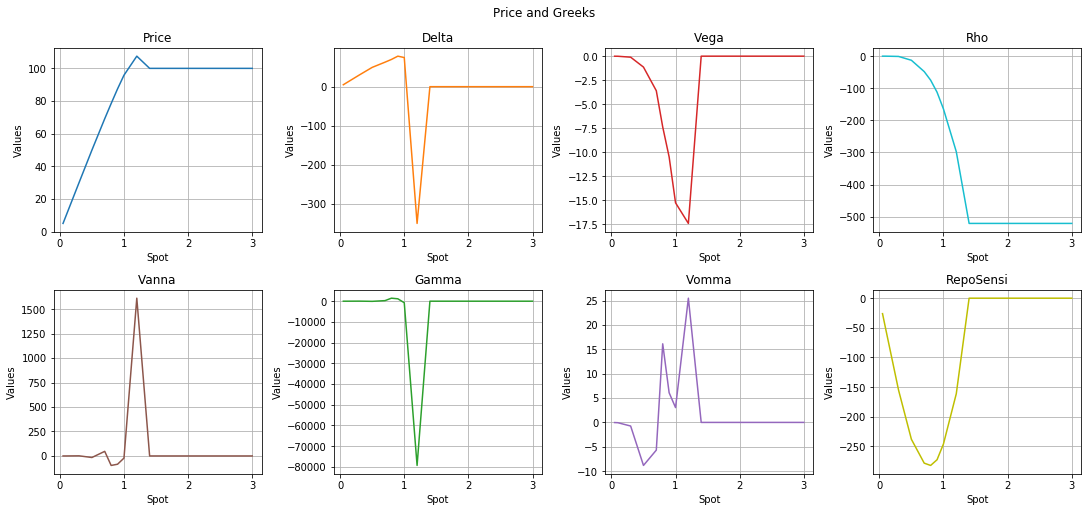

In [24]:
spotRef=100
maturity=5
acBarrierLevel=1.2
coupon=0.15
cpnBarrier=1.10
dipStrike=1
dipBarrier=0.9
isDipAmerican=True
cpnFrequency=Frequency.Annualy
isIncrementalFeature = False
isPhoenixMemory = False
nominal = 100
hasRedemption = False

autocallProduct = AutocallProduct(spotRef=spotRef,maturity=maturity,acBarrierLevel=acBarrierLevel,coupon=coupon,cpnBarrier=cpnBarrier,
                                  dipStrike=dipStrike,dipBarrier=dipBarrier,isDipAmerican=isDipAmerican,cpnFrequency=cpnFrequency,isIncrementalFeature = isIncrementalFeature,
                                isPhoenixMemory = isPhoenixMemory,Nominal=nominal,hasRedemption = hasRedemption )

sensiEngine = GenerateMCSensi(autocallProduct,AutocallPricer,bsModel,nbSim = 5000,discretStep = Frequency.TriDaily)
resSensi = sensiEngine.runPriceAndGreeks(listSpots=[0.05,0.1,0.3,0.5, 0.7,0.8,0.9, 1.0,1.2,1.4,1.5,1.7,2,2.5,3])
mcSensiPlot(resSensi)